In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import plotly.express as px


In [ ]:
income = pd.read_excel("/content/Income.xlsx")
jobs = pd.read_excel("/content/Jobs.xlsx")
people = pd.read_excel("/content/People.xlsx")
countyclass = pd.read_excel("/content/County Classifications.xlsx")

In [ ]:
countyclass.rename(columns={'FIPStxt': 'FIPS'}, inplace=True)
countyclass.head()

,FIPS,State,County,RuralUrbanContinuumCode2013,UrbanInfluenceCode2013,RuralUrbanContinuumCode2003,UrbanInfluenceCode2003,Metro2013,Nonmetro2013,Micropolitan2013,...,FarmDependent2003,ManufacturingDependent2000,LowEducation2000,RetirementDestination2000,PersistentPoverty2000,Noncore2013,Type_2015_Nonspecialized_NO,Metro_Adjacent2013,PersistentChildPoverty2004,RecreationDependent2000
0,1001,AL,Autauga,2.0,2.0,2.0,2.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1003,AL,Baldwin,3.0,2.0,4.0,5.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1005,AL,Barbour,6.0,6.0,6.0,6.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
3,1007,AL,Bibb,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1009,AL,Blount,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
#EXTRACTING RURAL COUNTIES
rural_counties = countyclass[
    (countyclass['Nonmetro2013'].isin([1]))]
rural_codes = rural_counties["FIPS"].tolist()
urban_counties = countyclass[(countyclass['Nonmetro2013'].isin([0]))]
urban_codes = urban_counties['FIPS'].tolist()

In [ ]:
print(rural_codes)

[1005, 1011, 1013, 1017, 1019, 1023, 1025, 1027, 1029, 1031, 1035, 1037, 1039, 1041, 1043, 1045, 1047, 1049, 1053, 1057, 1059, 1063, 1071, 1075, 1087, 1091, 1093, 1095, 1099, 1105, 1109, 1111, 1119, 1121, 1123, 1129, 1131, 1133, 2013, 2016, 2050, 2060, 2068, 2070, 2100, 2105, 2110, 2122, 2130, 2150, 2158, 2164, 2180, 2185, 2188, 2195, 2198, 2220, 2230, 2240, 2261, 2275, 2282, 2290, 4001, 4007, 4009, 4011, 4012, 4017, 4023, 5001, 5003, 5005, 5009, 5011, 5013, 5015, 5017, 5019, 5021, 5023, 5027, 5029, 5037, 5039, 5041, 5043, 5047, 5049, 5055, 5057, 5059, 5061, 5063, 5065, 5067, 5071, 5073, 5075, 5077, 5083, 5089, 5093, 5095, 5097, 5099, 5101, 5103, 5107, 5109, 5113, 5115, 5117, 5121, 5123, 5127, 5129, 5133, 5135, 5137, 5139, 5141, 5145, 5147, 5149, 6003, 6005, 6009, 6011, 6015, 6021, 6023, 6027, 6033, 6035, 6043, 6045, 6049, 6051, 6057, 6063, 6091, 6093, 6103, 6105, 6109, 8003, 8007, 8009, 8011, 8015, 8017, 8021, 8023, 8025, 8027, 8029, 8033, 8037, 8043, 8045, 8049, 8051, 8053, 8055, 805

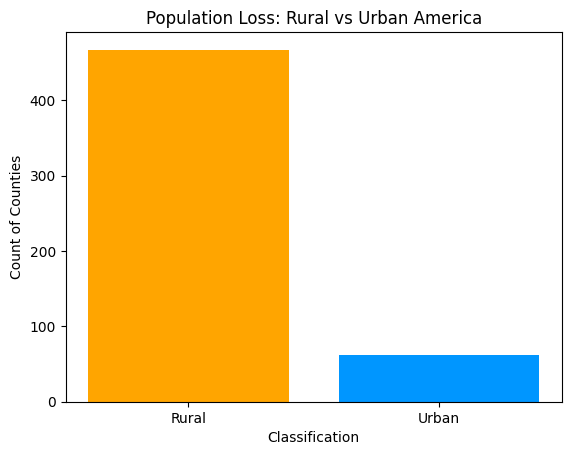

In [ ]:
population_loss = countyclass[['FIPS', 'Population_loss_2015_update']]

rural_population_loss = population_loss[population_loss['FIPS'].isin(rural_codes)]
urban_population_loss = population_loss[population_loss['FIPS'].isin(urban_codes)]

rural_population_loss_count = rural_population_loss['Population_loss_2015_update'].value_counts()
urban_population_loss_count = urban_population_loss['Population_loss_2015_update'].value_counts()

plt.bar(['Rural', 'Urban'], [rural_population_loss_count[1], urban_population_loss_count[1]], color=['orange', '#0096FF'])
plt.xlabel('Classification')
plt.title('Population Loss: Rural vs Urban America')
plt.ylabel('Count of Counties')
plt.show()

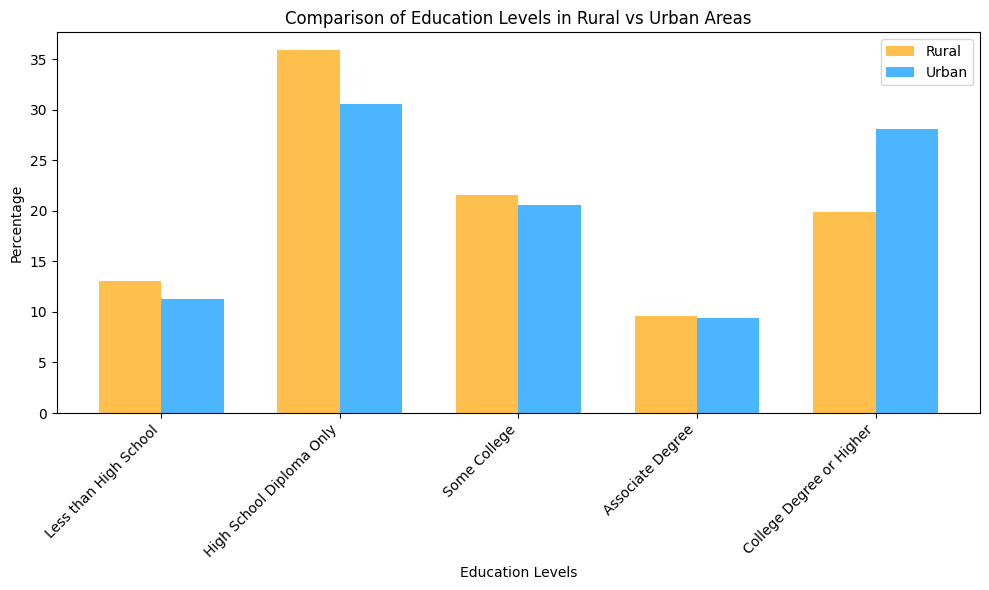

In [ ]:
Ed1LessThanHSPctRURAL = people[people['FIPS'].isin(rural_codes)][['FIPS', 'Ed1LessThanHSPct']]
Ed2HSDiplomaOnlyPctRURAL = people[people['FIPS'].isin(rural_codes)][['FIPS', 'Ed2HSDiplomaOnlyPct']]
Ed3SomeCollegePctRURAL = people[people['FIPS'].isin(rural_codes)][['FIPS', 'Ed3SomeCollegePct']]
Ed4AssocDegreePctRURAL = people[people['FIPS'].isin(rural_codes)][['FIPS', 'Ed4AssocDegreePct']]
Ed5CollegePlusPctRURAL = people[people['FIPS'].isin(rural_codes)][['FIPS', 'Ed5CollegePlusPct']]


Ed1LessThanHSPctURBAN = people[people['FIPS'].isin(urban_codes)][['FIPS', 'Ed1LessThanHSPct']]
Ed2HSDiplomaOnlyPctURBAN = people[people['FIPS'].isin(urban_codes)][['FIPS', 'Ed2HSDiplomaOnlyPct']]
Ed3SomeCollegePctURBAN = people[people['FIPS'].isin(urban_codes)][['FIPS', 'Ed3SomeCollegePct']]
Ed4AssocDegreePctURBAN = people[people['FIPS'].isin(urban_codes)][['FIPS', 'Ed4AssocDegreePct']]
Ed5CollegePlusPctURBAN = people[people['FIPS'].isin(urban_codes)][['FIPS', 'Ed5CollegePlusPct']]

education_levels_rural = {
    "Less than High School": Ed1LessThanHSPctRURAL["Ed1LessThanHSPct"].mean(),
    "High School Diploma Only": Ed2HSDiplomaOnlyPctRURAL["Ed2HSDiplomaOnlyPct"].mean(),
    "Some College": Ed3SomeCollegePctRURAL["Ed3SomeCollegePct"].mean(),
    "Associate Degree": Ed4AssocDegreePctRURAL["Ed4AssocDegreePct"].mean(),
    "College Degree or Higher": Ed5CollegePlusPctRURAL["Ed5CollegePlusPct"].mean(),
}

education_levels_urban = {
    "Less than High School": Ed1LessThanHSPctURBAN["Ed1LessThanHSPct"].mean(),
    "High School Diploma Only": Ed2HSDiplomaOnlyPctURBAN["Ed2HSDiplomaOnlyPct"].mean(),
    "Some College": Ed3SomeCollegePctURBAN["Ed3SomeCollegePct"].mean(),
    "Associate Degree": Ed4AssocDegreePctURBAN["Ed4AssocDegreePct"].mean(),
    "College Degree or Higher": Ed5CollegePlusPctURBAN["Ed5CollegePlusPct"].mean(),
}

labels = list(education_levels_rural.keys())
rural_values = list(education_levels_rural.values())
urban_values = list(education_levels_urban.values())

x = np.arange(len(labels))
width = 0.35
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, rural_values, width, label='Rural', color='orange', alpha=0.7)
plt.bar(x + width/2, urban_values, width, label='Urban', color='#0096FF', alpha=0.7)
plt.xlabel("Education Levels")
plt.ylabel("Percentage")
plt.title("Comparison of Education Levels in Rural vs Urban Areas")
plt.xticks(x, labels, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


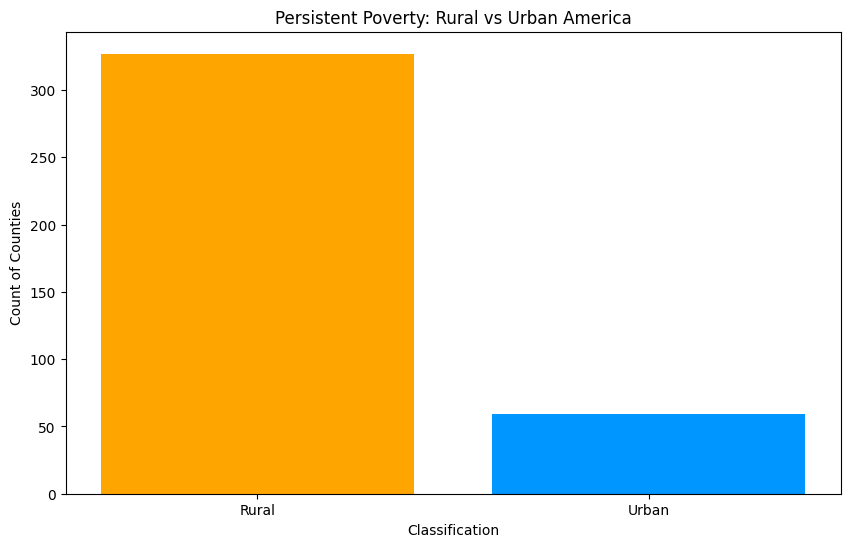

In [ ]:
persistent_poverty = countyclass[['FIPS', 'PersistentPoverty2000']]

rural_persistent_poverty = persistent_poverty[persistent_poverty['FIPS'].isin(rural_codes)]
urban_persistent_poverty = persistent_poverty[persistent_poverty['FIPS'].isin(urban_codes)]

rural_persistent_poverty_count = rural_persistent_poverty['PersistentPoverty2000'].value_counts()
urban_persistent_poverty_count = urban_persistent_poverty['PersistentPoverty2000'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(['Rural', 'Urban'], [rural_persistent_poverty_count[1], urban_persistent_poverty_count[1]], color=['orange', '#0096FF'])
plt.xlabel('Classification')
plt.title('Persistent Poverty: Rural vs Urban America')
plt.ylabel('Count of Counties')
plt.show()

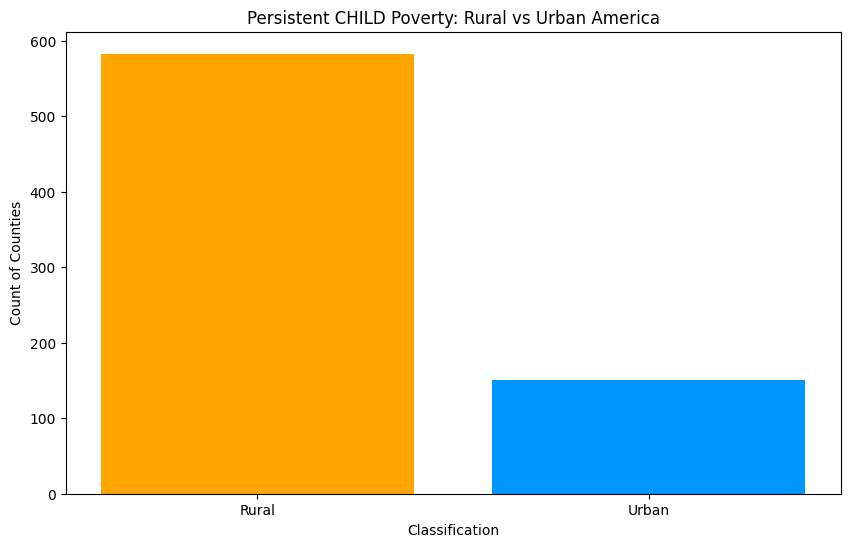

In [ ]:
persistent_child_poverty = countyclass[['FIPS', 'PersistentChildPoverty2004']]

rural_persistent_child_poverty = persistent_child_poverty[persistent_child_poverty['FIPS'].isin(rural_codes)]
urban_persistent_child_poverty = persistent_child_poverty[persistent_child_poverty['FIPS'].isin(urban_codes)]

rural_persistent_child_poverty_count = rural_persistent_child_poverty['PersistentChildPoverty2004'].value_counts()
urban_persistent_child_poverty_count = urban_persistent_child_poverty['PersistentChildPoverty2004'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(['Rural', 'Urban'], [rural_persistent_child_poverty_count[1], urban_persistent_child_poverty_count[1]], color=['orange', '#0096FF'])
plt.xlabel('Classification')
plt.title('Persistent CHILD Poverty: Rural vs Urban America')
plt.ylabel('Count of Counties')
plt.show()

In [ ]:
IncomeRural = income[income['FIPS'].isin(rural_codes)]
JobsRural = jobs[jobs['FIPS'].isin(rural_codes)]


GDPRural =  IncomeRural["PerCapitaInc"]
PovertyRural = IncomeRural["Poverty_Rate_ACS"]

TopGDPRural = IncomeRural.sort_values('PerCapitaInc', ascending=False).head(100)[['FIPS', 'PerCapitaInc']]
BottomGDPRural = IncomeRural.sort_values('PerCapitaInc', ascending=True).head(100)[['FIPS', 'PerCapitaInc']]


HighPovertyRural = IncomeRural.sort_values('Poverty_Rate_ACS', ascending=False).head(100)[['FIPS', 'Poverty_Rate_ACS']]
LowPovertyRural = IncomeRural.sort_values('Poverty_Rate_ACS', ascending=True).head(100)[['FIPS', 'Poverty_Rate_ACS']]


HighUnempRural = JobsRural.sort_values('UnempRate2021', ascending=False).head(100)[['FIPS', 'UnempRate2021']]
LowUnempRural = JobsRural.sort_values('UnempRate2021', ascending=True).head(100)[['FIPS', 'UnempRate2021']]



In [ ]:
HIGHGDPClass_df = pd.merge(countyclass, TopGDPRural[['FIPS']], on='FIPS', how='inner')
LOWGDPClass_df = pd.merge(countyclass, BottomGDPRural[['FIPS']], on='FIPS', how='inner')

HIGHGDPCreative_Count = HIGHGDPClass_df['HiCreativeClass2000'].value_counts()
LowGDPCreative_Count = LOWGDPClass_df['HiCreativeClass2000'].value_counts()

HIGHGDPAmenity_Count = HIGHGDPClass_df['HiAmenity'].value_counts()
LOWGDPAmenity_Count = LOWGDPClass_df['HiAmenity'].value_counts()


print(LowGDPCreative_Count)
print(LOWGDPAmenity_Count)




HiCreativeClass2000
0.0    91
Name: count, dtype: int64
HiAmenity
0.0    73
1.0    17
Name: count, dtype: int64


In [ ]:
HIGHPovertyClass_df = pd.merge(countyclass, HighPovertyRural[['FIPS']], on='FIPS', how='inner')
LOWPovertyClass_df = pd.merge(countyclass, LowPovertyRural[['FIPS']], on='FIPS', how='inner')

HIGHUnempClass_df = pd.merge(countyclass, HighUnempRural[['FIPS']], on='FIPS', how='inner')
LOWUnempClass_df = pd.merge(countyclass, LowUnempRural[['FIPS']], on='FIPS', how='inner')

HIGHPovertyCreative_Count = HIGHPovertyClass_df['HiCreativeClass2000'].value_counts()
LowPovertyCreative_Count = LOWPovertyClass_df['HiCreativeClass2000'].value_counts()

HIGHPovertyAmenity_Count = HIGHPovertyClass_df['HiAmenity'].value_counts()
LOWPovertyAmenity_Count = LOWPovertyClass_df['HiAmenity'].value_counts()

HighUnempCreative_Count = HIGHUnempClass_df['HiCreativeClass2000'].value_counts()
LowUnempCreative_Count = LOWUnempClass_df['HiCreativeClass2000'].value_counts()



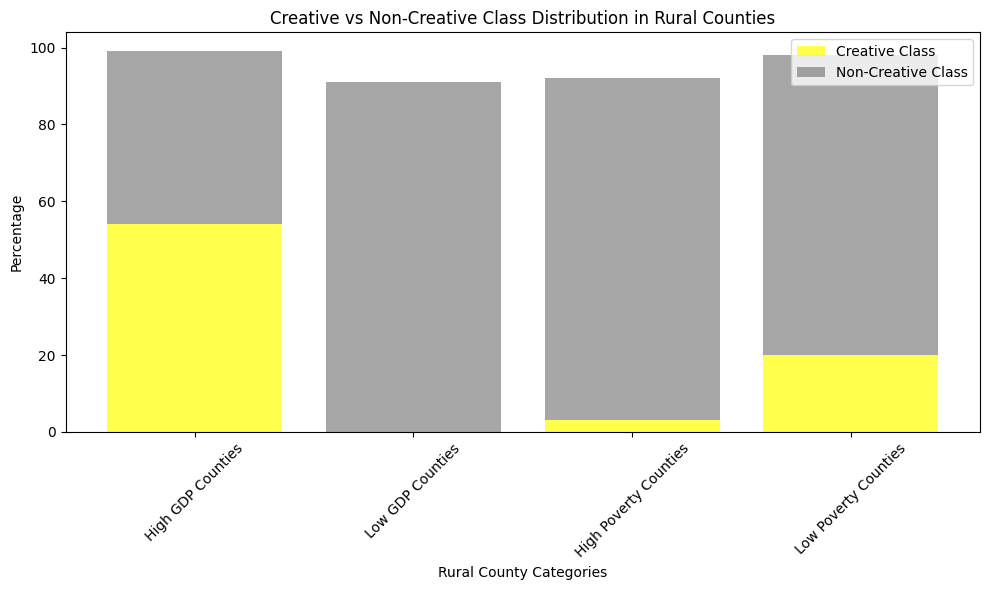

In [ ]:
categories = ['High GDP Counties', 'Low GDP Counties', 'High Poverty Counties', 'Low Poverty Counties' ]
creative_counts = [HIGHGDPCreative_Count.get(1, 0), LowGDPCreative_Count.get(1, 0), HIGHPovertyCreative_Count.get(1, 0), LowPovertyCreative_Count.get(1, 0) ]
non_creative_counts = [HIGHGDPCreative_Count.get(0, 0), LowGDPCreative_Count.get(0, 0), HIGHPovertyCreative_Count.get(0, 0), LowPovertyCreative_Count.get(0, 0)]
x = np.arange(len(categories))

plt.figure(figsize=(10, 6))
plt.bar(x, creative_counts, label='Creative Class', color='yellow', alpha=0.7)
plt.bar(x, non_creative_counts, bottom=creative_counts, label='Non-Creative Class', color='gray', alpha=0.7)


plt.xticks(x, categories, rotation=45)
plt.xlabel('Rural County Categories')
plt.ylabel('Percentage')
plt.title('Creative vs Non-Creative Class Distribution in Rural Counties')
plt.legend()

plt.tight_layout()
plt.show()

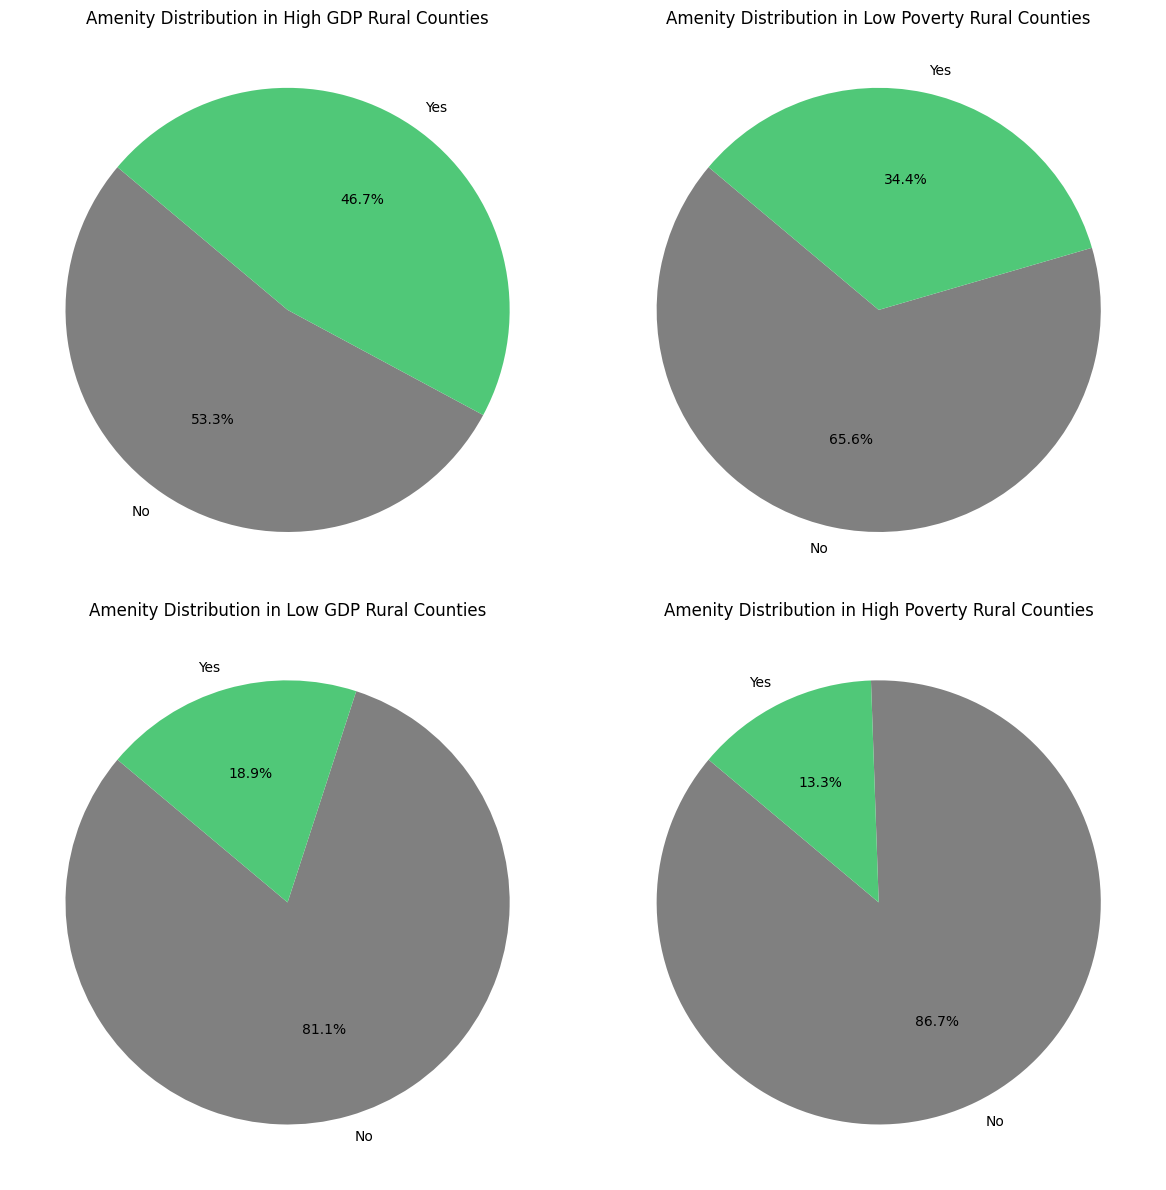

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

#HIGH GDP
axes[0, 0].pie(
    HIGHGDPAmenity_Count,
    labels=["No", "Yes"],
    autopct='%1.1f%%',
    startangle=140,
    colors=['gray', '#50C878']
)
axes[0, 0].set_title('Amenity Distribution in High GDP Rural Counties')
#LOWGDP
axes[1, 0].pie(
    LOWGDPAmenity_Count,
    labels=["No", "Yes"],
    autopct='%1.1f%%',
    startangle=140,
    colors=['gray', '#50C878']
)
axes[1, 0].set_title('Amenity Distribution in Low GDP Rural Counties')
#HIGH POVERTY
axes[1, 1].pie(
    HIGHPovertyAmenity_Count,
    labels= ["No", "Yes"],
    autopct='%1.1f%%',
    startangle=140,
    colors=['gray', '#50C878']
)
axes[1, 1].set_title('Amenity Distribution in High Poverty Rural Counties')
#LOW POVERTY
axes[0, 1].pie(
    LOWPovertyAmenity_Count,
    labels=["No", "Yes"],
    autopct='%1.1f%%',
    startangle=140,
    colors=['gray', '#50C878']
)
axes[0, 1].set_title('Amenity Distribution in Low Poverty Rural Counties')

plt.tight_layout()
plt.show()


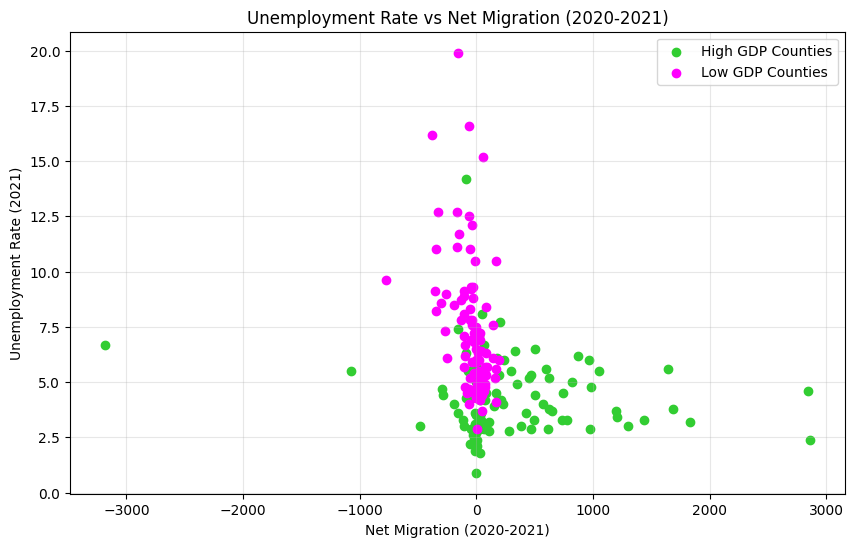

In [ ]:
jobs_high_gdp = pd.merge(
    TopGDPRural,
    jobs[['FIPS', 'UnempRate2021']],
    on='FIPS',
    how='inner'
)
top_gdp_data = pd.merge(
    jobs_high_gdp,
    people[['FIPS', 'Net_Migration_2020_2021']],
    on='FIPS',
    how='inner'
)
jobs_low_gdp = pd.merge(
    BottomGDPRural,
    jobs[['FIPS', 'UnempRate2021']],
    on='FIPS',
    how='inner'
)
low_gdp_data = pd.merge(
    jobs_low_gdp,
    people[['FIPS', 'Net_Migration_2020_2021']],
    on='FIPS',
    how='inner'
)

plt.figure(figsize=(10, 6))

plt.scatter(
    top_gdp_data['Net_Migration_2020_2021'],
    top_gdp_data['UnempRate2021'],
    color='#32CD32',
    label='High GDP Counties'

)

plt.scatter(
    low_gdp_data['Net_Migration_2020_2021'],
    low_gdp_data['UnempRate2021'],
    color='magenta',
    label='Low GDP Counties'

)

plt.title('Unemployment Rate vs Net Migration (2020-2021)')
plt.xlabel('Net Migration (2020-2021)')
plt.ylabel('Unemployment Rate (2021)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()



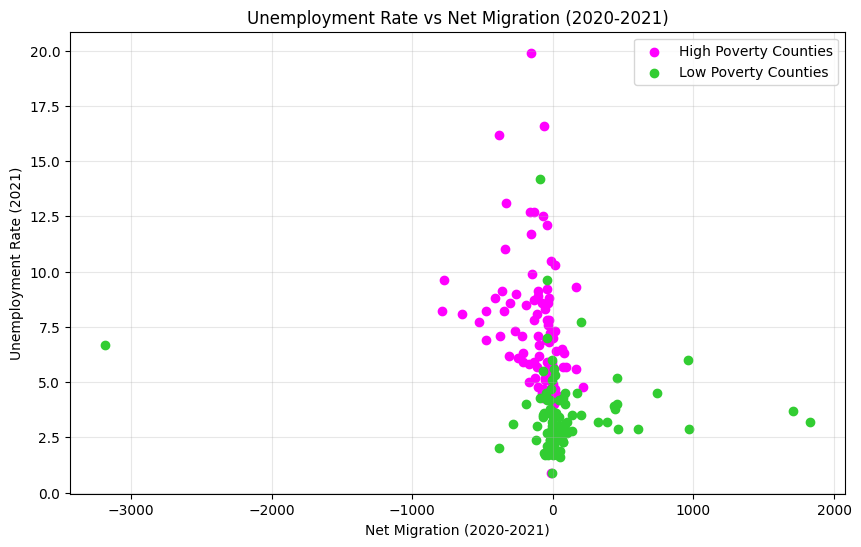

In [ ]:

jobs_high_poverty = pd.merge(
    HighPovertyRural,
    jobs[['FIPS', 'UnempRate2021']],
    on='FIPS',
    how='inner'
)
high_poverty_data = pd.merge(
    jobs_high_poverty,
    people[['FIPS', 'Net_Migration_2020_2021']],
    on='FIPS',
    how='inner'
)

jobs_low_poverty = pd.merge(
    LowPovertyRural,
    jobs[['FIPS', 'UnempRate2021']],
    on='FIPS',
    how='inner'
)
low_poverty_data = pd.merge(
    jobs_low_poverty,
    people[['FIPS', 'Net_Migration_2020_2021']],
    on='FIPS',
    how='inner'
)
plt.figure(figsize=(10, 6))

plt.scatter(
    high_poverty_data['Net_Migration_2020_2021'],
    high_poverty_data['UnempRate2021'],
    color='magenta',
    label='High Poverty Counties')

plt.scatter(
    low_poverty_data['Net_Migration_2020_2021'],
    low_poverty_data['UnempRate2021'],
    color='#32CD32',
    label='Low Poverty Counties')

plt.title('Unemployment Rate vs Net Migration (2020-2021)')
plt.xlabel('Net Migration (2020-2021)')
plt.ylabel('Unemployment Rate (2021)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()



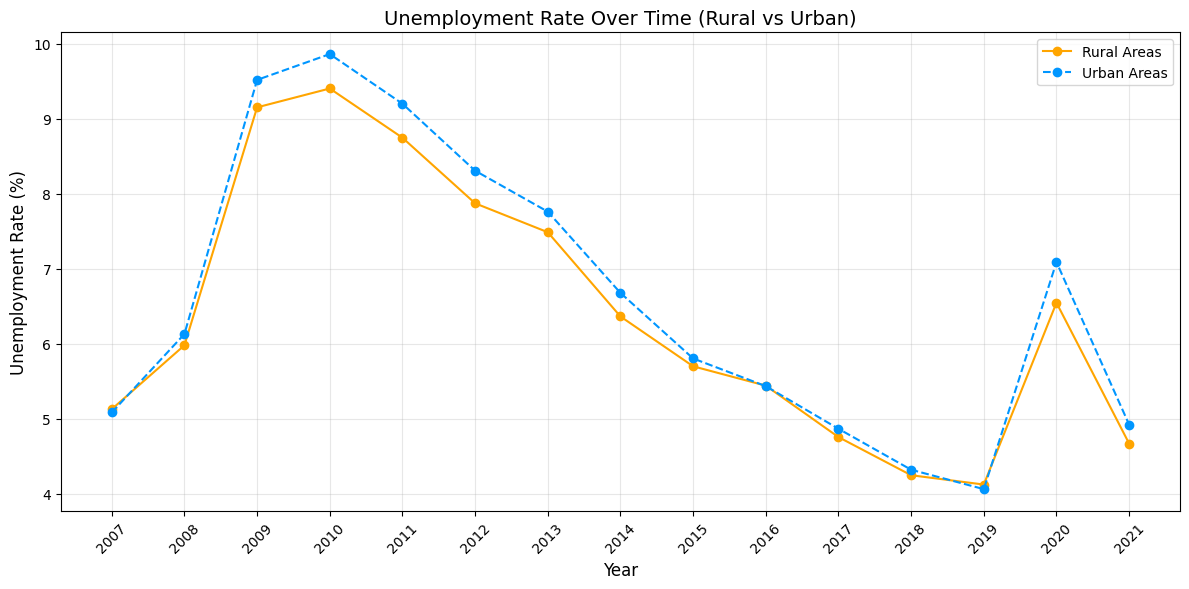

In [ ]:

jobs_rural = jobs[jobs['FIPS'].isin(rural_codes)]
jobs_urban = jobs[jobs['FIPS'].isin(urban_codes)]

unemployment_columns = [
    'UnempRate2007', 'UnempRate2008', 'UnempRate2009', 'UnempRate2010',
    'UnempRate2011', 'UnempRate2012', 'UnempRate2013', 'UnempRate2014',
    'UnempRate2015', 'UnempRate2016', 'UnempRate2017', 'UnempRate2018',
    'UnempRate2019', 'UnempRate2020', 'UnempRate2021'
]

rural_unemp_rates = jobs_rural[unemployment_columns].mean()
urban_unemp_rates = jobs_urban[unemployment_columns].mean()

years = [int(col.replace('UnempRate', '')) for col in unemployment_columns]

plt.figure(figsize=(12, 6))
plt.plot(years, rural_unemp_rates, label='Rural Areas', marker='o', linestyle='-', color='orange')
plt.plot(years, urban_unemp_rates, label='Urban Areas', marker='o', linestyle='--', color='#0096FF')

plt.title('Unemployment Rate Over Time (Rural vs Urban)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()


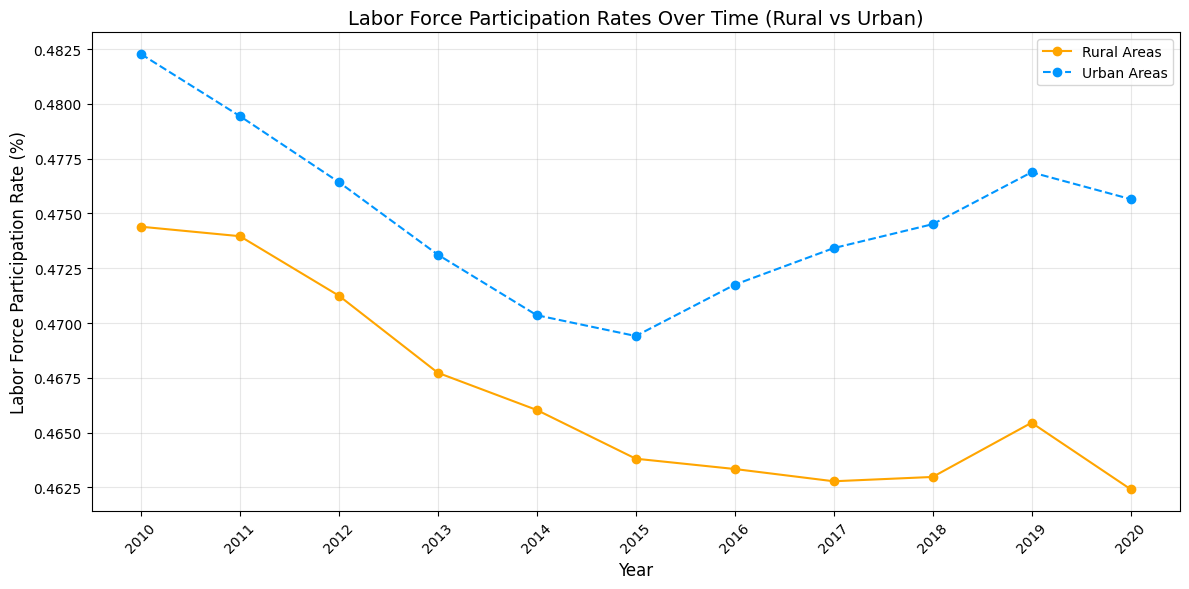

In [ ]:

merged_data = pd.merge(jobs, people, on='FIPS', how='inner')

rural_data = merged_data[merged_data['FIPS'].isin(rural_codes)]
urban_data = merged_data[merged_data['FIPS'].isin(urban_codes)]

labor_force_columns = [
    'NumCivLaborforce2010', 'NumCivLaborForce2011', 'NumCivLaborForce2012',
    'NumCivLaborforce2013', 'NumCivLaborforce2014', 'NumCivLaborforce2015',
    'NumCivLaborforce2016', 'NumCivLaborforce2017', 'NumCivLaborforce2018',
    'NumCivLaborforce2019', 'NumCivLaborForce2020'
]
population_columns = [
    'TotalPopEst2010', 'TotalPopEst2011', 'TotalPopEst2012', 'TotalPopEst2013',
    'TotalPopEst2014', 'TotalPopEst2015', 'TotalPopEst2016', 'TotalPopEst2017',
    'TotalPopEst2018', 'TotalPopEst2019', 'TotalPop2020'
]

rural_participation = rural_data[labor_force_columns].div(rural_data[population_columns].values, axis=1).mean()
urban_participation = urban_data[labor_force_columns].div(urban_data[population_columns].values, axis=1).mean()

years = [int(col.replace('NumCivLaborforce', '').replace('NumCivLaborForce', '')) for col in labor_force_columns]

plt.figure(figsize=(12, 6))
plt.plot(years, rural_participation, label='Rural Areas', marker='o', linestyle='-', color='orange')
plt.plot(years, urban_participation, label='Urban Areas', marker='o', linestyle='--', color='#0096FF')

plt.title('Labor Force Participation Rates Over Time (Rural vs Urban)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Labor Force Participation Rate (%)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()


In [ ]:

typology_map = {
    'Type_2015_Farming_NO': 'Farming-Dependent',
    'Type_2015_Government_NO': 'Government-Dependent',
    'Type_2015_Manufacturing_NO': 'Manufacturing-Dependent',
    'Type_2015_Mining_NO': 'Mining-Dependent',
    'Type_2015_Recreation_NO': 'Recreation-Dependent',
    'Type_2015_Nonspecialized_NO': 'Non-specialized'
}

def get_typology(row):
    for col, label in typology_map.items():
        if row[col] == 1:
            return label
    return 'Urban'  #TO MAKE IT URBAN IF NOT IN RURAL TYPOLOGY

countyclass['Typology'] = countyclass.apply(get_typology, axis=1)

countyclass['Typology'] = countyclass.apply(
    lambda row: 'Urban' if row['FIPS'] not in rural_codes else row['Typology'], axis=1
)

# GeoJSON file for U.S. counties TO BE MAPPED
geojson_url = "https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json"

fig_rural = px.choropleth(
    countyclass,
    geojson=geojson_url,
    locations='FIPS',
    color='Typology',
    title='ERS County Economic Typology - Rural Focus',
    scope='usa',
    color_discrete_map={
        'Farming-Dependent': 'cyan',
        'Government-Dependent': 'blue',
        'Manufacturing-Dependent': 'red',
        'Mining-Dependent': 'orange',
        'Recreation-Dependent': 'purple',
        'Non-specialized': 'green',
        'Urban': 'gray'
    }
)


fig_rural.show()


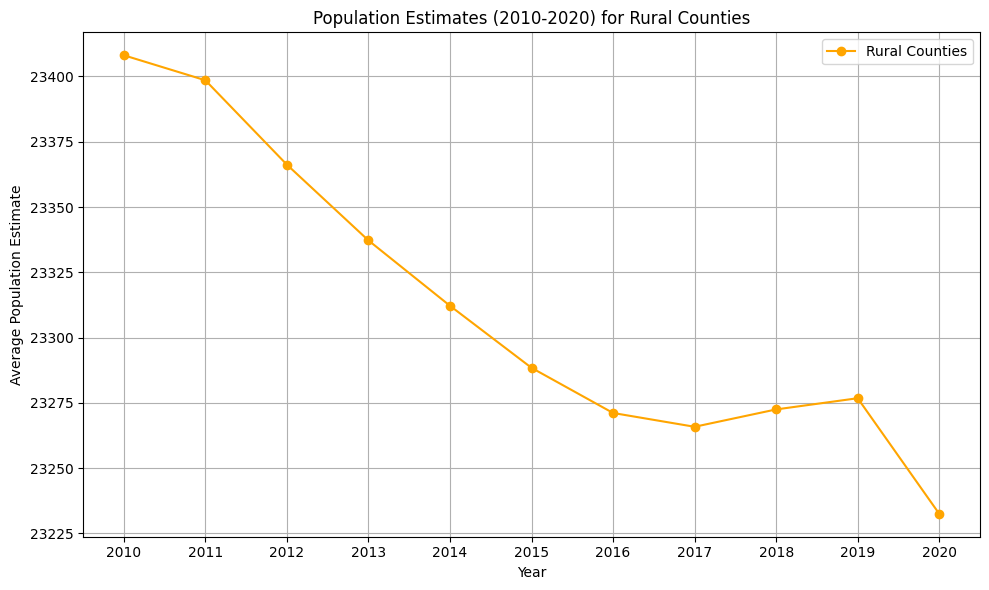

In [ ]:
RuralPopulation = people[people['FIPS'].isin(rural_codes)]
UrbanPopulation = people[people['FIPS'].isin(urban_codes)]

rural_avg_pop = RuralPopulation[["TotalPopEst2010",'TotalPopEst2011', 'TotalPopEst2012', 'TotalPopEst2013', 'TotalPopEst2014', 'TotalPopEst2015',
                                      'TotalPopEst2016', 'TotalPopEst2017', 'TotalPopEst2018', 'TotalPopEst2019', 'POPESTIMATE2020']].mean()

urban_avg_pop = UrbanPopulation[["TotalPopEst2010",'TotalPopEst2011', 'TotalPopEst2012', 'TotalPopEst2013', 'TotalPopEst2014', 'TotalPopEst2015',
                                    'TotalPopEst2016', 'TotalPopEst2017', 'TotalPopEst2018', 'TotalPopEst2019', 'POPESTIMATE2020']].mean()



poulation_df = pd.DataFrame({
    'Year': ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
    'Rural Population': rural_avg_pop.values,
    'Urban Popualation': urban_avg_pop.values
})


plt.figure(figsize=(10, 6))
plt.plot(poulation_df['Year'], poulation_df['Rural Population'], label='Rural Counties', color='orange', marker='o')
#plt.plot(poulation_df['Year'], poulation_df['Urban Popualation'], label='Urban Counties', color='blue', marker='o')
plt.title('Population Estimates (2010-2020) for Rural Counties')
plt.xlabel('Year')
plt.ylabel('Average Population Estimate')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



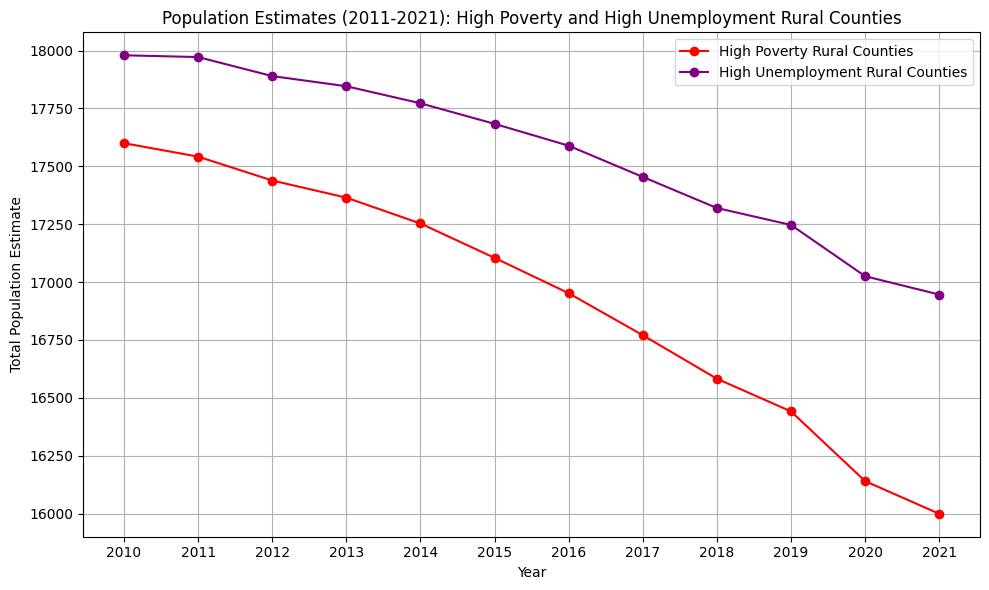

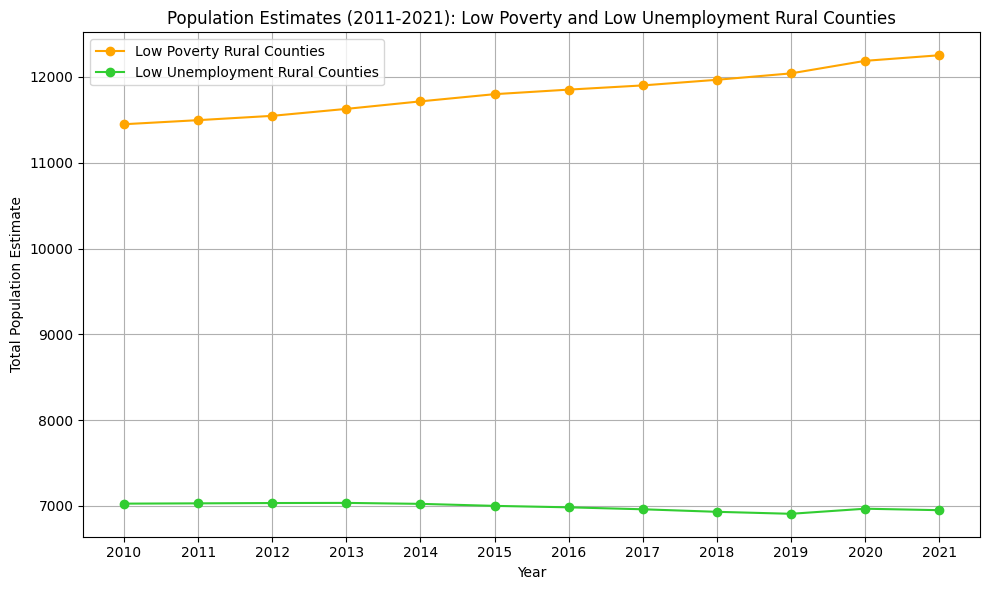

In [ ]:
TopGDPRuralPopulation = people[people['FIPS'].isin(TopGDPRural['FIPS'].tolist())]
BottomGDPRuralPopulation = people[people['FIPS'].isin(BottomGDPRural['FIPS'].tolist())]
HighPovertyRuralPopulation = people[people['FIPS'].isin(HighPovertyRural['FIPS'].tolist())]
LowPovertyRuralPopulation = people[people['FIPS'].isin(LowPovertyRural['FIPS'].tolist())]
HighUnempRuralPopulation = people[people['FIPS'].isin(HighUnempRural['FIPS'].tolist())]
LowUnempRuralPopulation = people[people['FIPS'].isin(LowUnempRural['FIPS'].tolist())]

high_gdp_rural_avg_pop = TopGDPRuralPopulation[["TotalPopEst2010",'TotalPopEst2011', 'TotalPopEst2012', 'TotalPopEst2013', 'TotalPopEst2014', 'TotalPopEst2015',
                                      'TotalPopEst2016', 'TotalPopEst2017', 'TotalPopEst2018', 'TotalPopEst2019', 'POPESTIMATE2020', 'POPESTIMATE2021']].mean()

low_gdp_rural_avg_pop = BottomGDPRuralPopulation[["TotalPopEst2010",'TotalPopEst2011', 'TotalPopEst2012', 'TotalPopEst2013', 'TotalPopEst2014', 'TotalPopEst2015',
                                    'TotalPopEst2016', 'TotalPopEst2017', 'TotalPopEst2018', 'TotalPopEst2019', 'POPESTIMATE2020', 'POPESTIMATE2021']].mean()

high_poverty_rural_avg_pop = HighPovertyRuralPopulation[["TotalPopEst2010",'TotalPopEst2011', 'TotalPopEst2012', 'TotalPopEst2013', 'TotalPopEst2014', 'TotalPopEst2015',
                                             'TotalPopEst2016', 'TotalPopEst2017', 'TotalPopEst2018', 'TotalPopEst2019', 'POPESTIMATE2020', 'POPESTIMATE2021']].mean()

low_poverty_rural_avg_pop = LowPovertyRuralPopulation[["TotalPopEst2010",'TotalPopEst2011', 'TotalPopEst2012', 'TotalPopEst2013', 'TotalPopEst2014', 'TotalPopEst2015',
                                           'TotalPopEst2016', 'TotalPopEst2017', 'TotalPopEst2018', 'TotalPopEst2019', 'POPESTIMATE2020', 'POPESTIMATE2021']].mean()

high_unemp_rural_avg_pop = HighUnempRuralPopulation[["TotalPopEst2010",'TotalPopEst2011', 'TotalPopEst2012', 'TotalPopEst2013', 'TotalPopEst2014', 'TotalPopEst2015',
                                             'TotalPopEst2016', 'TotalPopEst2017', 'TotalPopEst2018', 'TotalPopEst2019', 'POPESTIMATE2020', 'POPESTIMATE2021']].mean()

low_unemp_rural_avg_pop = LowUnempRuralPopulation[["TotalPopEst2010",'TotalPopEst2011', 'TotalPopEst2012', 'TotalPopEst2013', 'TotalPopEst2014', 'TotalPopEst2015',
                                           'TotalPopEst2016', 'TotalPopEst2017', 'TotalPopEst2018', 'TotalPopEst2019', 'POPESTIMATE2020', 'POPESTIMATE2021']].mean()


poulation_df = pd.DataFrame({
    'Year': ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
    'High GDP Rural': high_gdp_rural_avg_pop.values,
    'Low GDP Rural': low_gdp_rural_avg_pop.values,
    'High Poverty Rural': high_poverty_rural_avg_pop.values,
    'Low Poverty Rural': low_poverty_rural_avg_pop.values,
    'High Unemployment Rural': high_unemp_rural_avg_pop.values,
    'Low Unemployment Rural': low_unemp_rural_avg_pop.values
})


plt.figure(figsize=(10, 6))
plt.plot(poulation_df['Year'], poulation_df['High Poverty Rural'], label='High Poverty Rural Counties', color='red', marker='o')
plt.plot(poulation_df['Year'], poulation_df['High Unemployment Rural'], label='High Unemployment Rural Counties', color='purple', marker='o')
plt.title('Population Estimates (2011-2021): High Poverty and High Unemployment Rural Counties')
plt.xlabel('Year')
plt.ylabel('Total Population Estimate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(poulation_df['Year'], poulation_df['Low Poverty Rural'], label='Low Poverty Rural Counties', color='orange', marker='o')
plt.plot(poulation_df['Year'], poulation_df['Low Unemployment Rural'], label='Low Unemployment Rural Counties', color='#32CD32', marker='o')
plt.title('Population Estimates (2011-2021): Low Poverty and Low Unemployment Rural Counties')
plt.xlabel('Year')
plt.ylabel('Total Population Estimate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


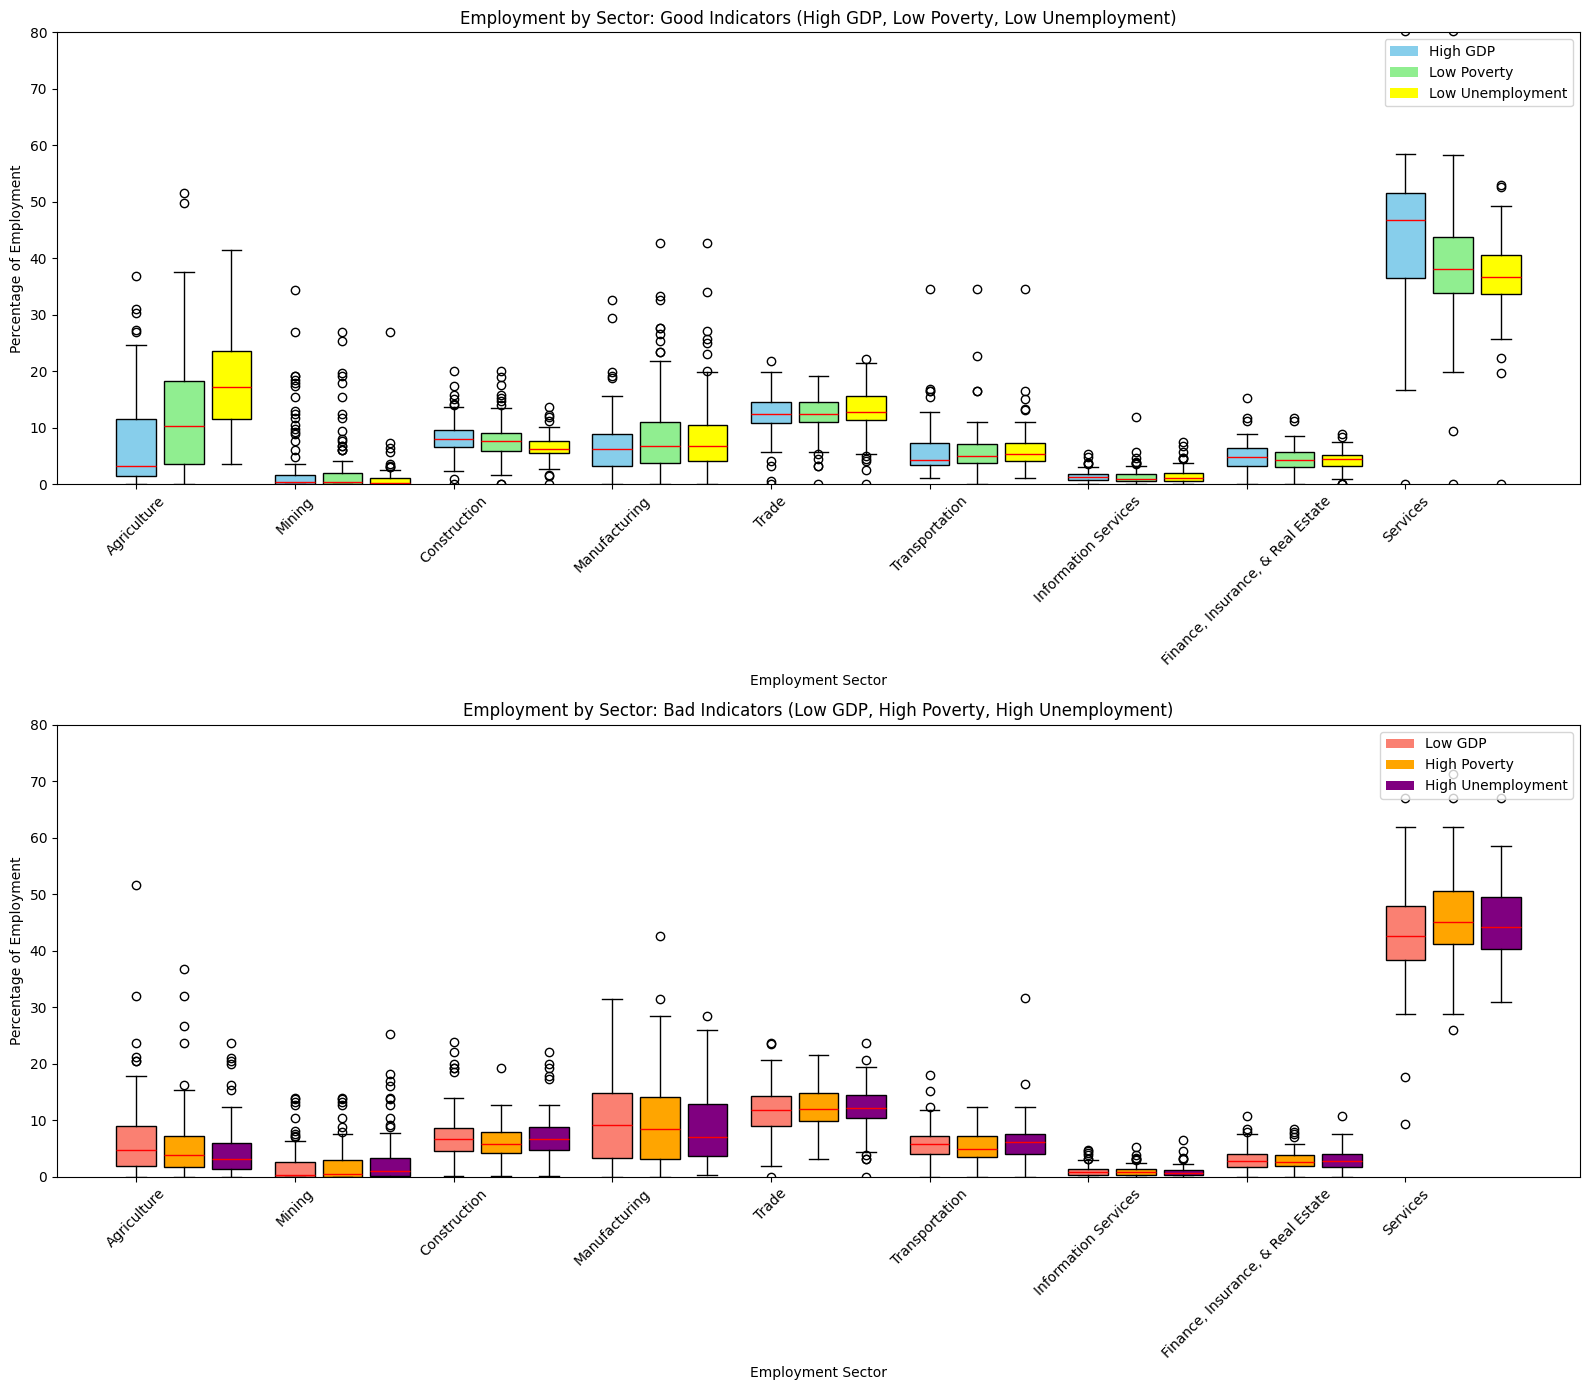

In [ ]:
employment_columns = ['PctEmpAgriculture', 'PctEmpMining', 'PctEmpConstruction', 'PctEmpManufacturing',
                      'PctEmpTrade', 'PctEmpTrans', 'PctEmpInformation', 'PctEmpFIRE', 'PctEmpServices']
proper_employment_columns = ["Agriculture", "Mining", "Construction", "Manufacturing",
                             "Trade", "Transportation", "Information Services", "Finance, Insurance, & Real Estate", "Services"]

HIGHGDPSectors_df = pd.merge(jobs, TopGDPRural[['FIPS']], on='FIPS', how='inner')
LOWGDPSectors_df = pd.merge(jobs, BottomGDPRural[['FIPS']], on='FIPS', how='inner')
HighPovertySectors_df = pd.merge(jobs, HighPovertyRural[['FIPS']], on='FIPS', how='inner')
LowPovertySectors_df = pd.merge(jobs, LowPovertyRural[['FIPS']], on='FIPS', how='inner')
HIGHUnmepSector_df = pd.merge(jobs, HighUnempRural[['FIPS']], on='FIPS', how='inner')
LOWUnmepSector_df = pd.merge(jobs, LowUnempRural[['FIPS']], on='FIPS', how='inner')



data = {
    'High GDP Rural': HIGHGDPSectors_df,
    'Low GDP Rural': LOWGDPSectors_df,
    'High Poverty Rural': HighPovertySectors_df,
    'Low Poverty Rural': LowPovertySectors_df,
    'High Unemployment Rural': HIGHUnmepSector_df,
    'Low Unemployment Rural': LOWUnmepSector_df
}

good_data = {
    'High GDP': HIGHGDPSectors_df,
    'Low Poverty': LowPovertySectors_df,
    'Low Unemployment': LOWUnmepSector_df
}

bad_data = {
    'Low GDP': LOWGDPSectors_df,
    'High Poverty': HighPovertySectors_df,
    'High Unemployment': HIGHUnmepSector_df
}

fig, axes = plt.subplots(2, 1, figsize=(16, 14))

def plot_boxplots(data, ax, title, colors, labels):
    ax.set_title(title)
    for i, (label, df) in enumerate(data.items()):
        ax.boxplot(
            [df[column] for column in employment_columns],
            positions=[x + i * 0.3 for x in range(len(employment_columns))],
            widths=0.25,
            patch_artist=True,
            boxprops=dict(facecolor=colors[i], color='black'),
            medianprops=dict(color='red')
        )
    for i, label in enumerate(labels):
        ax.bar(0, 0, color=colors[i], label=label)
    ax.legend(loc='upper right')
    ax.set_xticks(range(len(employment_columns)))
    ax.set_xticklabels(proper_employment_columns, rotation=45)
    ax.set_xlabel('Employment Sector')
    ax.set_ylabel('Percentage of Employment')
    ax.set_ylim(0, 80)

plot_boxplots(
    good_data,
    axes[0],
    'Employment by Sector: Good Indicators (High GDP, Low Poverty, Low Unemployment)',
    ['skyblue', 'lightgreen', 'yellow'],
    ['High GDP', 'Low Poverty', 'Low Unemployment']
)

plot_boxplots(
    bad_data,
    axes[1],
    'Employment by Sector: Bad Indicators (Low GDP, High Poverty, High Unemployment)',
    ['salmon', 'orange', 'purple'],
    ['Low GDP', 'High Poverty', 'High Unemployment']
)

plt.tight_layout()
plt.show()


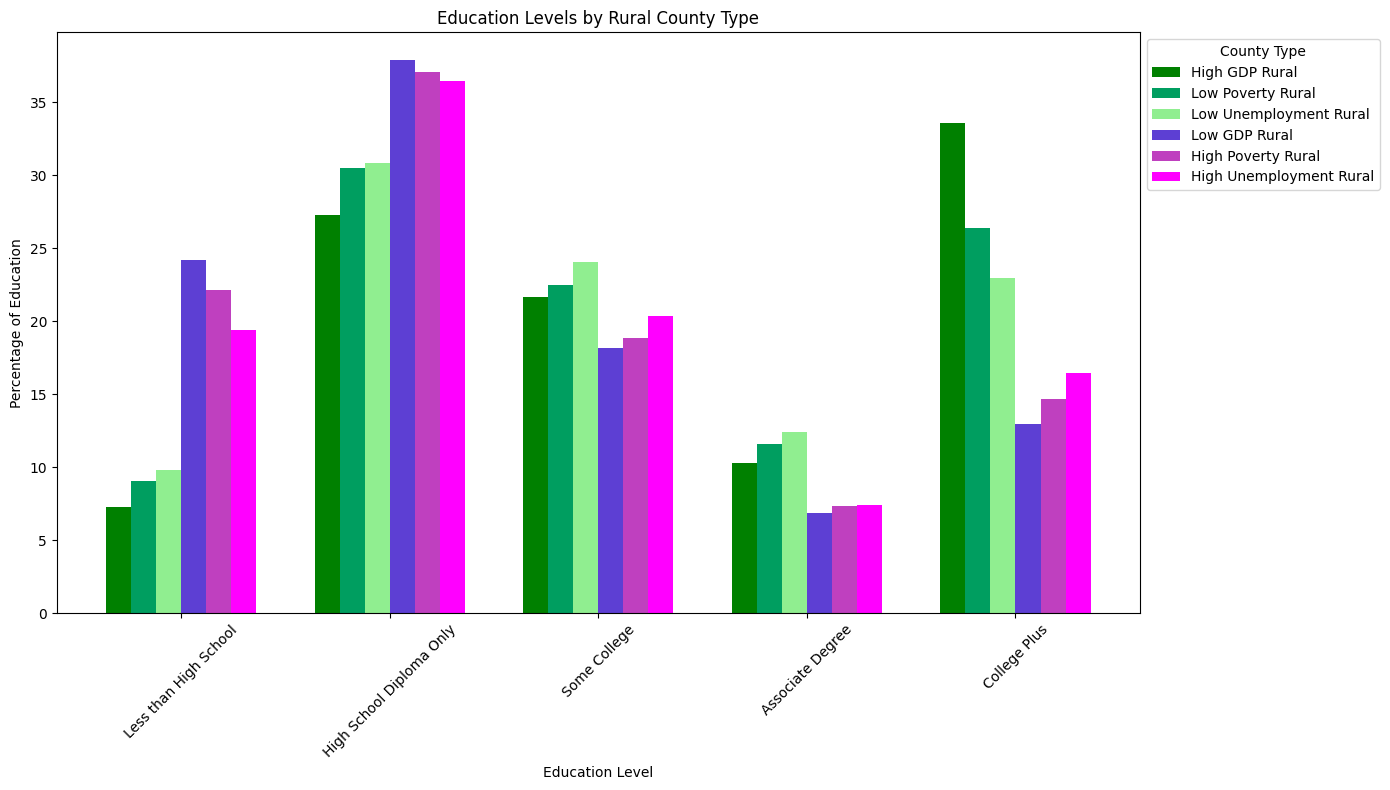

In [ ]:


education_columns = ['Ed1LessThanHSPct', 'Ed2HSDiplomaOnlyPct', 'Ed3SomeCollegePct', 'Ed4AssocDegreePct', 'Ed5CollegePlusPct']
proper_education_columns = ['Less than High School', 'High School Diploma Only', 'Some College', 'Associate Degree', 'College Plus']

HIGHGDPEdu_df = pd.merge(people, TopGDPRural[['FIPS']], on='FIPS', how='inner')
LOWGDPEdu_df = pd.merge(people, BottomGDPRural[['FIPS']], on='FIPS', how='inner')
HighPovertyEdu_df = pd.merge(people, HighPovertyRural[['FIPS']], on='FIPS', how='inner')
LowPovertyEdu_df = pd.merge(people, LowPovertyRural[['FIPS']], on='FIPS', how='inner')
HIGHUnmepEdu_df = pd.merge(people, HighUnempRural[['FIPS']], on='FIPS', how='inner')
LOWUnmepEdu_df = pd.merge(people, LowUnempRural[['FIPS']], on='FIPS', how='inner')

high_gdp_EDU_data = HIGHGDPEdu_df[education_columns].mean()
low_gdp_EDU_data = LOWGDPEdu_df[education_columns].mean()
high_poverty_EDU_data = HighPovertyEdu_df[education_columns].mean()
low_poverty_EDU_data = LowPovertyEdu_df[education_columns].mean()
high_unemp_EDU_data = HIGHUnmepEdu_df[education_columns].mean()
low_unemp_EDU_data = LOWUnmepEdu_df[education_columns].mean()

categories = ['High GDP Rural', 'Low Poverty Rural',  'Low Unemployment Rural', 'Low GDP Rural', 'High Poverty Rural','High Unemployment Rural']

data = {
    'High GDP Rural': high_gdp_EDU_data,
    'Low Poverty Rural': low_poverty_EDU_data,
    'Low Unemployment Rural': low_unemp_EDU_data,
    'Low GDP Rural': low_gdp_EDU_data,
    'High Poverty Rural': high_poverty_EDU_data,
    'High Unemployment Rural': high_unemp_EDU_data,
}

colors = {
    'High GDP Rural': 'green',
    'Low GDP Rural': '#5D3FD3',
    'High Poverty Rural': '#BF40BF',
    'Low Poverty Rural': '#009E60',
    'High Unemployment Rural': 'magenta',
    'Low Unemployment Rural': '#90EE90'
}

fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.12
index = np.arange(len(education_columns))

for j, category in enumerate(categories):
    positions = index + j * bar_width
    for i, education_level in enumerate(education_columns):
        ax.bar(positions[i], data[category][education_level], bar_width, label=category if i == 0 else "", color=colors[category])

ax.set_xticks(index + bar_width * (len(categories) - 1) / 2)
ax.set_xticklabels(proper_education_columns, rotation=45)
ax.set_xlabel('Education Level')
ax.set_ylabel('Percentage of Education')
ax.set_title('Education Levels by Rural County Type')

ax.legend(title="County Type", loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


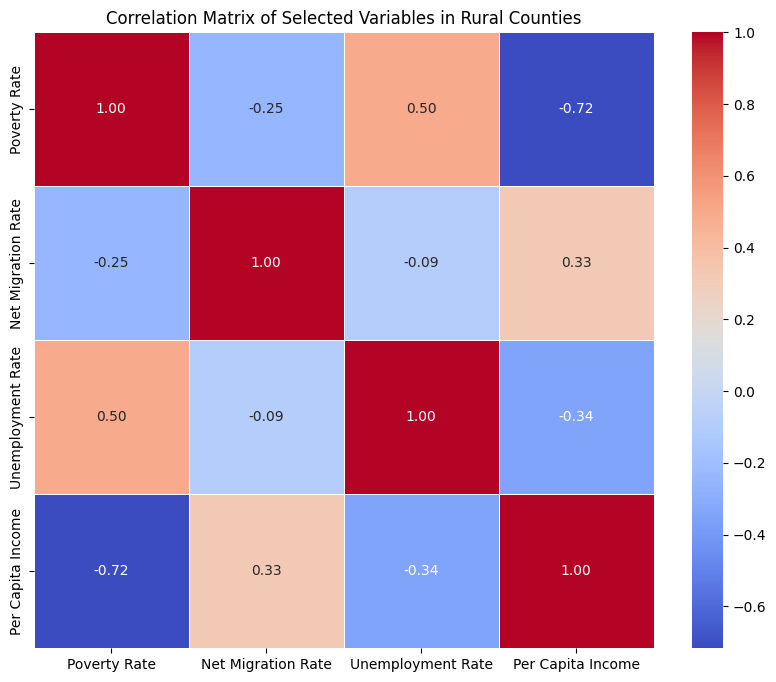

In [ ]:

income_rural = income[income['FIPS'].isin((rural_codes))]
people_rural = people[people['FIPS'].isin((rural_codes))]
jobs_rural = jobs[jobs['FIPS'].isin((rural_codes))]

merged_data = pd.merge(income_rural[['FIPS', 'Poverty_Rate_ACS','PerCapitaInc']],
                       people_rural[['FIPS', 'NetMigrationRate1019']],
                       on='FIPS', how='inner')
merged_data = pd.merge(merged_data,
                       jobs_rural[['FIPS', 'UnempRate2021', ]],
                       on='FIPS', how='inner')
correlation_matrix = merged_data[['Poverty_Rate_ACS', 'NetMigrationRate1019', 'UnempRate2021','PerCapitaInc']].corr()


column_rename_map = {
    'Poverty_Rate_ACS': 'Poverty Rate',
    'NetMigrationRate1019': 'Net Migration Rate',
    'UnempRate2021': 'Unemployment Rate',
    'PerCapitaInc': 'Per Capita Income'
}

correlation_matrix = merged_data[['Poverty_Rate_ACS', 'NetMigrationRate1019', 'UnempRate2021', 'PerCapitaInc']].corr()
correlation_matrix.rename(columns=column_rename_map, index=column_rename_map, inplace=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Selected Variables in Rural Counties')
plt.show()



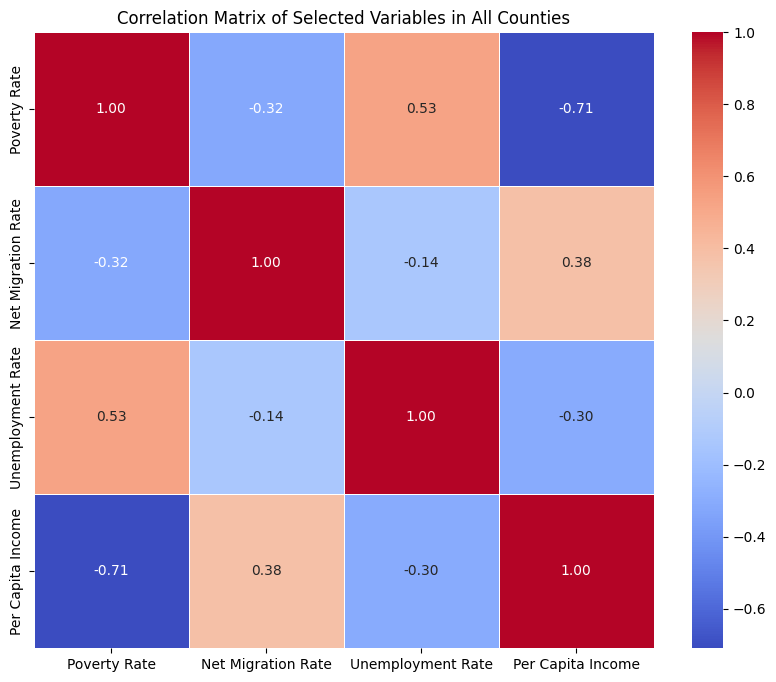

In [ ]:


merged_data = pd.merge(income[['FIPS', 'Poverty_Rate_ACS','PerCapitaInc']],
                       people[['FIPS', 'NetMigrationRate1019']],
                       on='FIPS', how='inner')
merged_data = pd.merge(merged_data,
                       jobs[['FIPS', 'UnempRate2021', ]],
                       on='FIPS', how='inner')
correlation_matrix = merged_data[['Poverty_Rate_ACS', 'NetMigrationRate1019', 'UnempRate2021','PerCapitaInc']].corr()



column_rename_map = {
    'Poverty_Rate_ACS': 'Poverty Rate',
    'NetMigrationRate1019': 'Net Migration Rate',
    'UnempRate2021': 'Unemployment Rate',
    'PerCapitaInc': 'Per Capita Income'
}

correlation_matrix = merged_data[['Poverty_Rate_ACS', 'NetMigrationRate1019', 'UnempRate2021', 'PerCapitaInc']].corr()
correlation_matrix.rename(columns=column_rename_map, index=column_rename_map, inplace=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Selected Variables in All Counties')
plt.show()



In [ ]:
rural_data = people[people['FIPS'].isin(rural_codes)][['FIPS', 'Age65AndOlderPct2020']].copy()
urban_data = people[people['FIPS'].isin(urban_codes)][['FIPS', 'Age65AndOlderPct2020']].copy()

rural_data['Shading'] = rural_data['Age65AndOlderPct2020']
urban_data['Shading'] = urban_data['Age65AndOlderPct2020']

urban_gray = people[people['FIPS'].isin(urban_codes)][['FIPS']].copy()
urban_gray['Shading'] = rural_data['Shading'].min() - 1
rural_data_with_gray = pd.concat([rural_data, urban_gray])

rural_gray = people[people['FIPS'].isin(rural_codes)][['FIPS']].copy()
rural_gray['Shading'] = urban_data['Shading'].min() - 1
urban_data_with_gray = pd.concat([urban_data, rural_gray])

geojson_url = "https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json"

fig_rural = px.choropleth(
    rural_data_with_gray,
    geojson=geojson_url,
    locations='FIPS',
    color='Shading',
    title='Age 65 and Older Population Percentage (Rural Counties with Urban Areas in Gray)',
    scope='usa',
    color_continuous_scale="Oranges",
    range_color=(rural_data['Shading'].min(), rural_data['Shading'].max()),
    labels={'Shading': 'Age 65+'}
)

fig_rural.add_annotation(
    x=0.5,
    y=-0.1,
    xref="paper",
    yref="paper",
    text="Note: Urban counties are shaded white. Data is Unavailable for Grey Areas.",
    showarrow=False,
    font=dict(size=12, color="black")
)
fig_rural.update_traces(marker_line_color='black', marker_line_width=0.5)
fig_rural.show()

fig_urban = px.choropleth(
    urban_data_with_gray,
    geojson=geojson_url,
    locations='FIPS',
    color='Shading',
    title='Age 65 and Older Population Percentage (Urban Counties with Rural Areas in Gray)',
    scope='usa',
    color_continuous_scale="Blues",
    range_color=(urban_data['Shading'].min(), urban_data['Shading'].max()),
    labels={'Shading': 'Age 65+'}
)

fig_urban.add_annotation(
    x=0.5,
    y=-0.1,
    xref="paper",
    yref="paper",
    text="Note: Rural counties are shaded white. Data is Unavailable for Grey Areas.",
    showarrow=False,
    font=dict(size=12, color="black")
)
fig_urban.update_traces(marker_line_color='black', marker_line_width=0.5)
fig_urban.show()
fig_rural.write_html("rural_map.html")

fig_urban.write_html("urban_map.html")
